In [1]:
%matplotlib inline

# arxivpy is a specialized library to extract the very nested XML that arxiv provides.  
# https://github.com/titipata/arxivpy
# One dependency for arxivpy is feedparser, but be very careful when installing that in conda - It will try to force a
# python downgrade.  https://github.com/ContinuumIO/anaconda-issues/issues/10221#issuecomment-433100755 for a commandline
# option to stop forcing downgrades.  (Supposedly fixed for more recent conda installs but I still have this issue on Mac.)
import arxivpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

In [2]:
# Create empty dataframe
df = pd.DataFrame()

In [3]:
# This query is written for a user to get a sample of data to test the other notebooks.  It will take days and a lot of
# work, patience, and troubleshooting to obtain the entire dataset that I'm using.  If I'm able to find a service that can
# host my data (~250mb), a link will be provided in the project README.

# Download 1,000 articles from the relevant subsections of arXiv.  (Max results per iteration = 2000, but they prefer less.)
# NOTE: If you want to download more than 1k articles as I've written for you, you'll need to plot your downloads.  ArXiv
# has the flakiest API, and arxivpy prevents you from knowing when it fails.  You'll know if the code as I've written it
# fails because it will make an empty df.  Just try again in a few minutes.
articles = arxivpy.query(search_query=['astro-ph.CO', 'astro-ph.GA', 'astro-ph.EP', 
                                       'astro-ph.HE', 'astro-ph.IM', 'astro-ph.SR'],
                         start_index=0, max_index=1000, 
                         results_per_iteration=1000,
                         wait_time=5.0, sort_by='lastUpdatedDate')

In [4]:
data = pd.DataFrame.from_dict(articles)
df = df.append(data,ignore_index=True)

# These lines are necessary if you need to rerun the data on a non-empty df
df.drop_duplicates(inplace=True)
df.sort_values('update_date',ascending=False,inplace=True)
df.reset_index(drop=True,inplace=True)

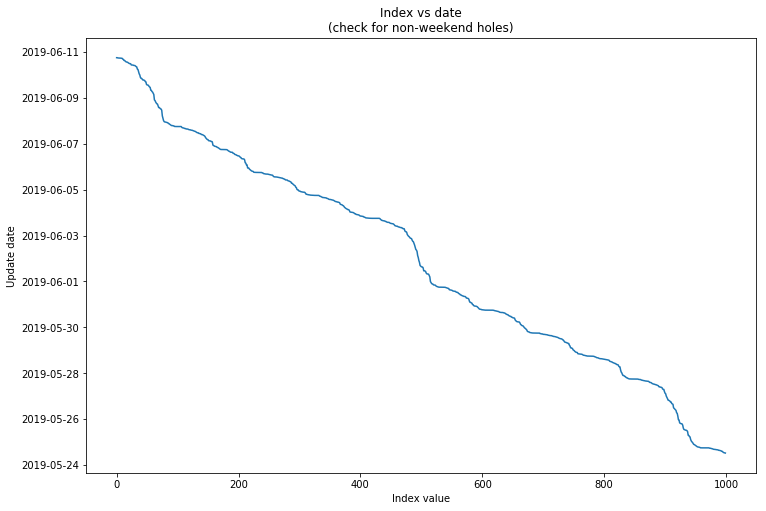

In [5]:
# Plot the update_date by the index to check for unexpected gaps
_ = plt.figure(figsize=(12,8))
_ = df.update_date.plot()
_ = plt.xlabel('Index value')
_ = plt.ylabel('Update date')
_ = plt.title('Index vs date\n(check for non-weekend holes)')

In [6]:
# There should be zero null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
abstract        1000 non-null object
authors         1000 non-null object
comment         1000 non-null object
id              1000 non-null object
journal_ref     1000 non-null object
main_author     1000 non-null object
pdf_url         1000 non-null object
publish_date    1000 non-null datetime64[ns, UTC]
term            1000 non-null object
terms           1000 non-null object
title           1000 non-null object
update_date     1000 non-null datetime64[ns, UTC]
url             1000 non-null object
dtypes: datetime64[ns, UTC](2), object(11)
memory usage: 101.6+ KB


In [7]:
# Check the structure of the entries
# NOTE: journal_ref will be removed in next notebook as all entries are 
# 'No journal ref found.'
df.iloc[500]

abstract        We examine the early growth of supermassive bl...
authors                Kuan-Wei Huang, Yu Feng, Tiziana Di Matteo
comment                                          No comment found
id                                                   1906.00242v1
journal_ref                                  No journal ref found
main_author                                     Tiziana Di Matteo
pdf_url                         http://arxiv.org/pdf/1906.00242v1
publish_date                            2019-06-01 15:25:14+00:00
term                                                  astro-ph.GA
terms                                                 astro-ph.GA
title           The early growth of supermassive black holes i...
update_date                             2019-06-01 15:25:14+00:00
url                             http://arxiv.org/abs/1906.00242v1
Name: 500, dtype: object

In [8]:
# Save to csv in order to properly run future notebooks
df.to_csv('astro_yourtestdata_1k.csv')